# Regression Project: Predicting the Sale Prices of Homes in Seattle, Washington

Dataset is downloaded from Kaggle: https://www.kaggle.com/datasets/samuelcortinhas/house-price-prediction-seattle/code

In [37]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)


In [38]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [39]:
df_train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [40]:
df_train.shape, df_test.shape

((2016, 8), (505, 8))

In [41]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   l

(None, None)

## Exploring the dataset

Note that:
- beds = number of bedrooms in the house
- baths = number of bathrooms in the house and 0.5 means a half-bathroom which has a sink and a toilet but no shower or bathtub
- size = the size of the house in square feet
- size_units = the unit of the size of the house
- lot_size = the total area of the land where the property is located on. The lot belongs to the house owner.
- lot_size_units = the unit of the lot size
- zip_code = the zip code of the location of the house
- price = the price of the house in dollars (USD)
- 1 acre = 43560 square feet


In [42]:
# Checking for missing values
df_train.isnull().sum(), df_test.isnull().sum()

(beds                0
 baths               0
 size                0
 size_units          0
 lot_size          347
 lot_size_units    347
 zip_code            0
 price               0
 dtype: int64,
 beds               0
 baths              0
 size               0
 size_units         0
 lot_size          77
 lot_size_units    77
 zip_code           0
 price              0
 dtype: int64)

In [43]:
# Checking for the proportion of missing values in the dataset
df_train.isnull().sum()/df_train.shape[0]*100, df_test.isnull().sum()/df_test.shape[0]*100

(beds               0.000000
 baths              0.000000
 size               0.000000
 size_units         0.000000
 lot_size          17.212302
 lot_size_units    17.212302
 zip_code           0.000000
 price              0.000000
 dtype: float64,
 beds               0.000000
 baths              0.000000
 size               0.000000
 size_units         0.000000
 lot_size          15.247525
 lot_size_units    15.247525
 zip_code           0.000000
 price              0.000000
 dtype: float64)

Huge percentage of missing values in the lot_size column as well as the corresponding lot_size_units column in both datasets. We will assume that the minimum lot size  will be the size_unit, which is what we will use to fill it. This helps to logically ensure that the lot size is not less than the size of the house and deviation from the truth is minimal.

In [44]:
df_train[['size', 'size_units', 'lot_size', 'lot_size_units']].head()

,size,size_units,lot_size,lot_size_units
0,2590.0,sqft,6000.00,sqft
1,2240.0,sqft,0.31,acre
2,2040.0,sqft,3783.00,sqft
3,3800.0,sqft,5175.00,sqft
4,1042.0,sqft,NaN,NaN


In [45]:
df_train.groupby('lot_size_units')['lot_size_units'].count()

lot_size_units
acre     220
sqft    1449
Name: lot_size_units, dtype: int64

In [46]:
df_test.groupby('lot_size_units')['lot_size_units'].count()

lot_size_units
acre     59
sqft    369
Name: lot_size_units, dtype: int64

## Data Cleaning and Preprocessing

In [47]:
# Some values in the lot_size_units column are in acres and some are in sqft. We will convert all the values to sqft

# We will define a function to convert the values in the lot_size column to sqft
def convert_to_sqft(row):
    if row['lot_size_units'] == 'sqft':
        return row['lot_size']
    else:
        return row['lot_size']*43560

In [48]:
# Applying the function to the dataset
df_train['lot_size'] = df_train.apply(lambda row: convert_to_sqft(row), axis=1)

In [49]:
df_train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [50]:
df_test['lot_size'] = df_test.apply(lambda row: convert_to_sqft(row), axis=1)

In [51]:
df_test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.0,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.0,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.0,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,12196.8,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.0,sqft,98107,1187000.0


In [52]:
# Changing the lot_size_units column to sqft
df_train['lot_size_units'] = 'sqft'
df_test['lot_size_units'] = 'sqft'


In [53]:
df_train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,sqft,98102,950000.0


In [54]:
# Dealing with missing values

#1. Finding the average lot_size:size and applying it to the missing values
df_train['avg_lot_ratio'] = df_train['lot_size']/df_train['size']
df_train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,avg_lot_ratio
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,2.316602
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0,6.028393
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,1.854412
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,1.361842
4,2,2.0,1042.0,sqft,NaN,sqft,98102,950000.0,NaN


In [55]:
df_train['avg_lot_ratio'].mean()

38.00439044304304

In [56]:
df_train['avg_lot_ratio'].median()

2.334375

In [57]:
df_train['avg_lot_ratio'].max()

43560.0

The data above implies that the dataset is likely heavily skewed to the right (positively skewed) probably due the presence of outliers or extremely high values in the dataset

In [59]:
# Sorting and showing the biggest ten values

df_train.sort_values(by='avg_lot_ratio', na_position='first').tail(20)


,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,avg_lot_ratio
645,2,2.5,1365.0,sqft,176418.0,sqft,98118,525000.0,129.243956
952,2,2.0,877.0,sqft,114562.8,sqft,98115,415000.0,130.630331
1394,2,2.0,1006.0,sqft,144619.2,sqft,98112,650000.0,143.756660
266,2,2.0,1245.0,sqft,179031.6,sqft,98168,330000.0,143.800482
1908,2,2.5,1138.0,sqft,172933.2,sqft,98126,515000.0,151.962390
1451,2,1.0,885.0,sqft,154202.4,sqft,98105,389000.0,174.240000
783,1,1.0,626.0,sqft,114562.8,sqft,98115,275000.0,183.007668
465,2,1.0,903.0,sqft,176853.6,sqft,98146,363500.0,195.851163
1218,2,1.0,903.0,sqft,176853.6,sqft,98146,312500.0,195.851163
596,2,2.0,1415.0,sqft,278784.0,sqft,98125,449000.0,197.020495


Lot size above 202989.6sqft are massive outliers and would not be used.

In [60]:
# Repalcing the outliers with NaN in the lot_size column

df_train['lot_size'] = df_train['lot_size'].where(df_train['avg_lot_ratio'] <= 290, np.nan)

df_train.sort_values(by='avg_lot_ratio', na_position='first').tail(20)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,avg_lot_ratio
645,2,2.5,1365.0,sqft,176418.0,sqft,98118,525000.0,129.243956
952,2,2.0,877.0,sqft,114562.8,sqft,98115,415000.0,130.630331
1394,2,2.0,1006.0,sqft,144619.2,sqft,98112,650000.0,143.756660
266,2,2.0,1245.0,sqft,179031.6,sqft,98168,330000.0,143.800482
1908,2,2.5,1138.0,sqft,172933.2,sqft,98126,515000.0,151.962390
1451,2,1.0,885.0,sqft,154202.4,sqft,98105,389000.0,174.240000
783,1,1.0,626.0,sqft,114562.8,sqft,98115,275000.0,183.007668
465,2,1.0,903.0,sqft,176853.6,sqft,98146,363500.0,195.851163
1218,2,1.0,903.0,sqft,176853.6,sqft,98146,312500.0,195.851163
596,2,2.0,1415.0,sqft,278784.0,sqft,98125,449000.0,197.020495


In [61]:
# Counting the number of missing values in the lot_size column, it should be 2 more than the previous count

df_train['lot_size'].isnull().sum()

349

In [62]:
# We will use the median of the lot_size column to fill the missing values

df_train['lot_size'] = df_train['lot_size'].fillna(df_train['lot_size'].median())

In [63]:
df_train['lot_size'].isnull().sum()

0

As for the test dataset, we will remove all NaN values in the lot_size column so as to avoid any errors.

In [64]:
df_test = df_test.dropna(subset=['lot_size'])

In [65]:
df_test.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [66]:
df_train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price,avg_lot_ratio
0,3,2.5,2590.0,sqft,6000.0,sqft,98144,795000.0,2.316602
1,4,2.0,2240.0,sqft,13503.6,sqft,98106,915000.0,6.028393
2,4,3.0,2040.0,sqft,3783.0,sqft,98107,950000.0,1.854412
3,4,3.0,3800.0,sqft,5175.0,sqft,98199,1950000.0,1.361842
4,2,2.0,1042.0,sqft,5000.0,sqft,98102,950000.0,NaN


In [70]:
# Zipcode column issue
df_train['zip_code'].nunique()

28

In [71]:
# Converting the zip_code to a categorical variable

df_train['zip_code'] = df_train['zip_code'].astype('category')
df_test['zip_code'] = df_test['zip_code'].astype('category')

In [73]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   beds            2016 non-null   int64   
 1   baths           2016 non-null   float64 
 2   size            2016 non-null   float64 
 3   size_units      2016 non-null   object  
 4   lot_size        2016 non-null   float64 
 5   lot_size_units  2016 non-null   object  
 6   zip_code        2016 non-null   category
 7   price           2016 non-null   float64 
 8   avg_lot_ratio   1669 non-null   float64 
dtypes: category(1), float64(5), int64(1), object(2)
memory usage: 129.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   beds            428 non-null    int64   
 1   baths           428 non-null    float64 
 2   size            42

Checking Correlation between the features and the target variable

In [84]:
df_train1 = df_train[['price', 'beds', 'baths', 'size', 'lot_size', 'zip_code']]
df_train1.head()

,price,beds,baths,size,lot_size,zip_code
0,795000.0,3,2.5,2590.0,6000.0,98144
1,915000.0,4,2.0,2240.0,13503.6,98106
2,950000.0,4,3.0,2040.0,3783.0,98107
3,1950000.0,4,3.0,3800.0,5175.0,98199
4,950000.0,2,2.0,1042.0,5000.0,98102


C:\Users\OLAMIDE\AppData\Local\Temp\ipykernel_260\2282815026.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_train1.corr(), cmap='YlGnBu', annot=True)


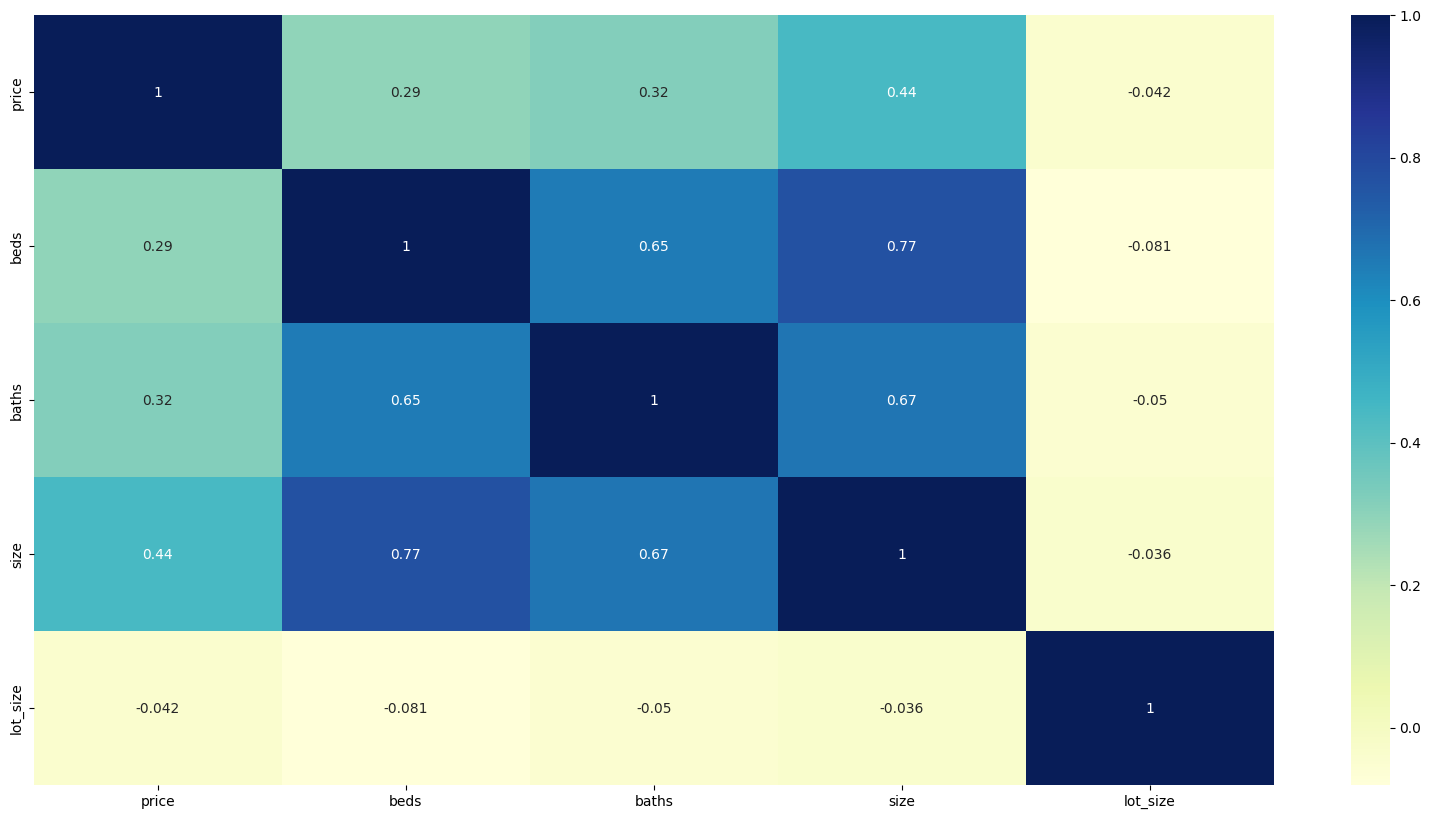

In [85]:
# plotting the correlation heatmap

dataplot = sns.heatmap(df_train1.corr(), cmap='YlGnBu', annot=True)
plt.show()

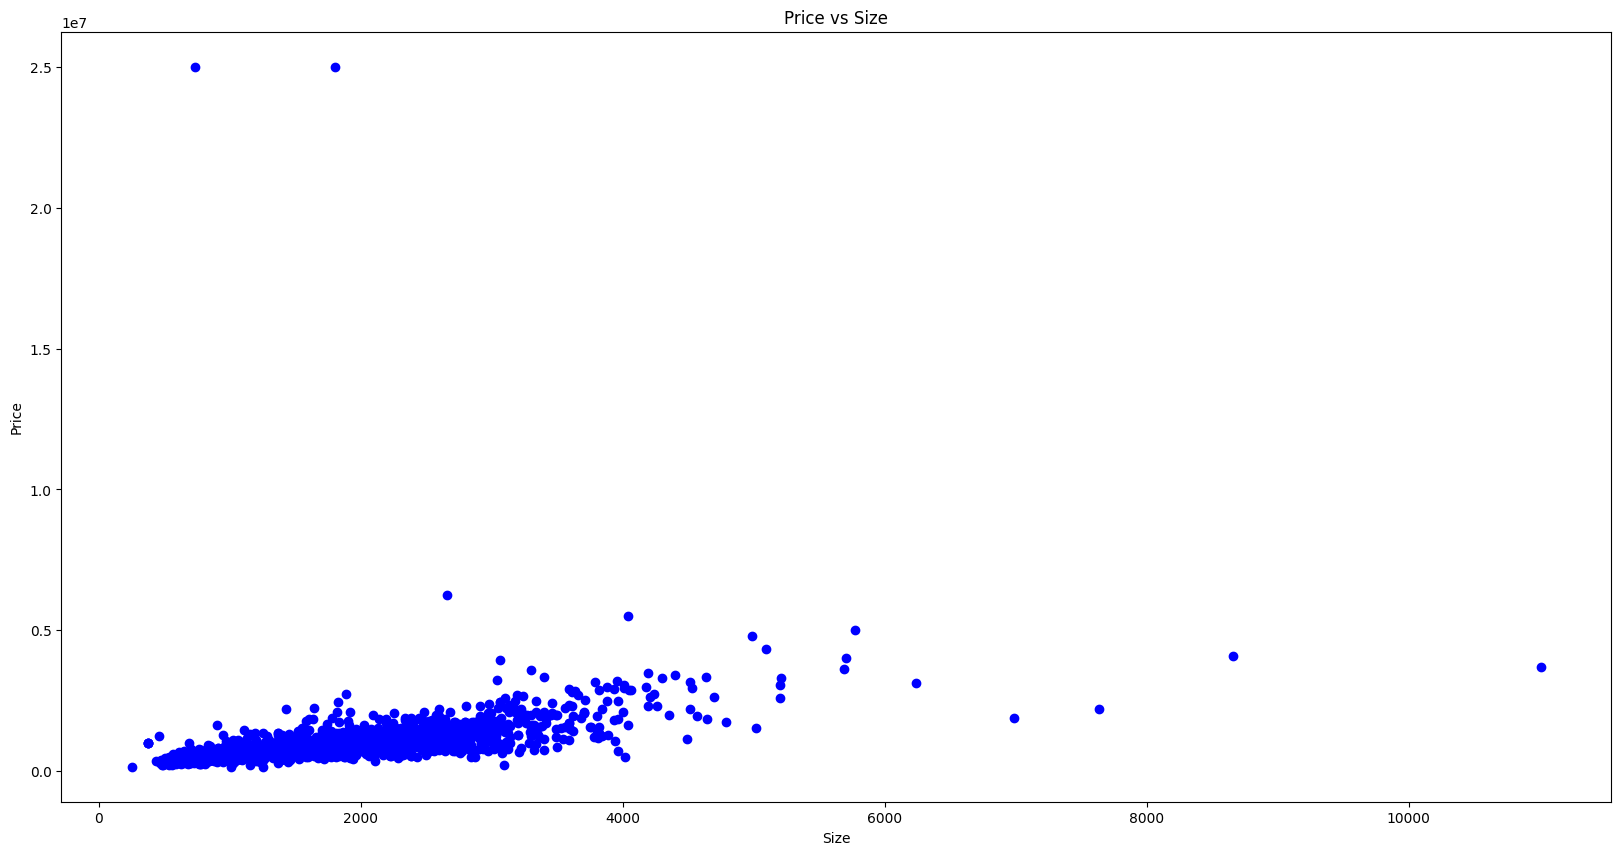

In [86]:
plt.scatter(df_train1['size'], df_train1['price'], color='blue')
plt.title('Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [87]:
# Checking the two outliers in the price column
df_train1['price'].sort_values(ascending=False).head()

1359    25000000.0
1700    25000000.0
637      6250000.0
61       5495000.0
805      5000000.0
Name: price, dtype: float64

In [88]:
mean_by_zip_code = df_train1.groupby('zip_code')['price'].mean().sort_values(ascending=False)
print(mean_by_zip_code.shape)
mean_by_zip_code.head(10)

(28,)


zip_code
98105    2.012199e+06
98112    1.636133e+06
98199    1.197310e+06
98102    1.178258e+06
98177    1.157941e+06
98119    1.048173e+06
98136    1.020102e+06
98115    1.016978e+06
98109    1.012418e+06
98117    9.875575e+05
Name: price, dtype: float64

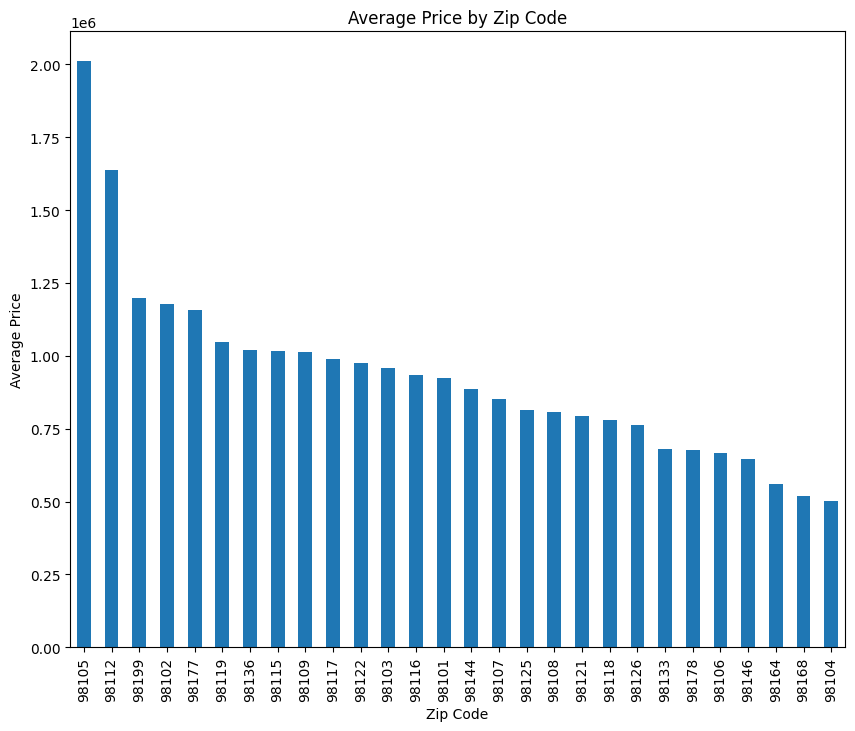

In [89]:
plt.figure(figsize=(10, 8))
mean_by_zip_code.plot(kind='bar')
plt.title('Average Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.show()

## Building Regression Model

In [90]:
# Building a multiple regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = np.asanyarray(df_train1[['beds', 'baths', 'size', 'lot_size', 'zip_code']])
y = np.asanyarray(df_train1[['price']])

model.fit(X, y)


LinearRegression()

In [91]:
# Getting the coefficients

print('Coefficients: ', model.coef_)

Coefficients:  [[-1.08411627e+05  6.16529580e+04  5.29082359e+02 -1.11967123e+00
  -2.97452401e+03]]


## Prediction and Evaluation of the Model

In [92]:
y_hat = model.predict(df_test[['beds', 'baths', 'size', 'lot_size', 'zip_code']])
X = np.asanyarray(df_test[['beds', 'baths', 'size', 'lot_size', 'zip_code']])
y = np.asanyarray(df_test[['price']])

print("Residual sum of squares: %.2f"
        % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction 
print('Variance score: %.2f' % model.score(X, y))

Residual sum of squares: 193100072447.57
Variance score: 0.49


c:\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False]
}

# Define the model
model2 = LinearRegression()

# Define the grid search with cross-validation
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform the grid search
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_test = df_test['price']
y_pred = best_model.predict(df_test[['beds', 'baths', 'size', 'lot_size', 'zip_code']])
mse = mean_squared_error(y_test, y_pred)
print("Best Model MSE:", mse)

Best Model MSE: 187608301496.0876


c:\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [100]:
y_hat_df = pd.DataFrame(y_hat, columns=['Predicted Price'])
y_hat_df.head()

,Predicted Price
0,1.608532e+06
1,1.761723e+06
2,6.399411e+05
3,1.073433e+06
4,1.197554e+06


In [101]:
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Price'])
y_pred_df.head()

,Predicted Price
0,1.552001e+06
1,1.771887e+06
2,5.541753e+05
3,1.197849e+06
4,1.169406e+06


In [107]:
y_test_df = df_test['price']
y_test_df.head()

0    1175000.0
1    1057500.0
2     799000.0
3     565000.0
4    1187000.0
Name: price, dtype: float64